In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import seaborn as sns
import statsmodels.formula.api as smf
import ratmetab
import itertools
import re
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
codebookpath = '../RatMetabolites/Rat_codebook_27_Oct_2022.csv'
datapath = {
    'blood new': 'blood_27_Oct_2022',
    'brain new': 'brain_27_Oct_2022',
    'blood old': 'old_blood_17_Nov_2022',
    'brain old': 'old_brain_17_Nov_2022',
               }
data = {k: ratmetab.read_data('../RatMetabolites/Rat_' + v + '.csv', codebookpath, liberal_filter=True) for k, v in datapath.items()}

data.update({tissue: pd.concat([data[tissue + ' new'], data[tissue + ' old']], axis=0, join='outer') for tissue in ['blood', 'brain']})
def insert_centered_LIscore(dataset, data=data):
    df = data[dataset]
    s = df.LIscore - df.LIscore.mean()
    val = pd.concat([pd.DataFrame({'LIscore cent.': s}, index=df.index), df], axis=1)
    return(val)

def insert_age(dataset, data=data):
    df = data[dataset]
    l = [(lambda g: 'Y' if g == 'Y' else 'A')(group) for group in df.Group]
    val = pd.concat([pd.DataFrame({'Age': l}, index=df.index), df], axis=1)
    return(val)

data = {dataset: insert_age(dataset, data=data) for dataset in data.keys()}
data = {dataset: insert_centered_LIscore(dataset, data=data) for dataset in data.keys()}

In [3]:
fpath = '../RatMetabolites/rat_metab_summary.csv'
summary = pd.read_csv(fpath, index_col=0)
summary

,Dataset,Comparison,Analyte class,Metabolite,Effect size,"""- log p""",p,Corrected p,Reject H0,Bonferroni alpha,Direction of change,Rank
Phosphatidylcholine aa C40:5,blood new,AI vs. AU,Phosphatidylcholines,Phosphatidylcholine aa C40:5,-0.656900,1.831301,0.014747,0.769241,False,0.000174,Decrease,1
Linolenic acid,blood new,AI vs. AU,Free_Fatty_Acids,Linolenic acid,-0.442021,1.707973,0.019590,0.769241,False,0.000174,Decrease,2
"5-beta,6-beta-Epoxycholesterol",blood new,AI vs. AU,Free_Oxysterols,"5-beta,6-beta-Epoxycholesterol",-1.162864,1.677275,0.021024,0.769241,False,0.000174,Decrease,3
Spermine,blood new,AI vs. AU,Amino_Acids_and_Biogenic_Amines,Spermine,0.550324,1.646695,0.022558,0.769241,False,0.000174,Increase,4
trans-4-Hydroxyproline,blood new,AI vs. AU,Amino_Acids_and_Biogenic_Amines,trans-4-Hydroxyproline,0.969954,1.588279,0.025806,0.769241,False,0.000174,Increase,5
"5-alpha,6-alpha-Epoxycholesterol",blood new,AI vs. AU,Free_Oxysterols,"5-alpha,6-alpha-Epoxycholesterol",-1.300067,1.496875,0.031851,0.769241,False,0.000174,Decrease,6
alpha-Aminoadipic acid,blood new,AI vs. AU,Amino_Acids_and_Biogenic_Amines,alpha-Aminoadipic acid,0.461159,1.455831,0.035008,0.769241,False,0.000174,Increase,7
Phosphatidylcholine aa C40:4,blood new,AI vs. AU,Phosphatidylcholines,Phosphatidylcholine aa C40:4,-0.451711,1.443368,0.036027,0.769241,False,0.000174,Decrease,8
Glycine,blood new,AI vs. AU,Amino_Acids_and_Biogenic_Amines,Glycine,0.392926,1.374221,0.042245,0.769241,False,0.000174,Increase,9
2-Hydroxyacyldihydroceramide C16:0,blood new,AI vs. AU,Ceramides,2-Hydroxyacyldihydroceramide C16:0,-0.403521,1.335998,0.046132,0.769241,False,0.000174,Decrease,10


In [4]:
top10 = summary.loc[(summary.Dataset == 'blood') & (summary.Comparison == 'AI vs. AU') & (summary.Rank <= 16), 'Metabolite'].to_list()
top10

['Phosphatidylcholine aa C40:5',
 'Phosphatidylcholine aa C40:4',
 '24,25-Epoxycholesterol',
 '24,25-Dihydrolanosterol',
 'Desmosterol',
 '5-beta,6-beta-Epoxycholesterol',
 'Dihydroceramide C22:0',
 'Phosphatidylcholine aa C42:4',
 'Phosphatidylcholine aa C42:5',
 'Phosphatidylcholine ae C42:2',
 'Phosphatidylcholine aa C40:2',
 'Hydroxysphingomyelin C14:1',
 'Phosphatidylcholine aa C38:3',
 'Spermine',
 'Phosphatidylcholine aa C42:6',
 '7-alpha-Hydroxycholesterol']

Text(0, 0.5, 'LIscore')

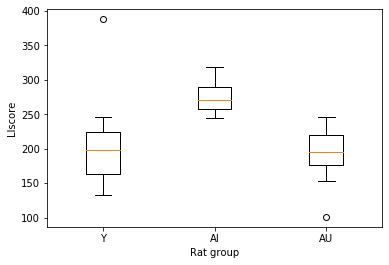

In [5]:
df = data['blood']
d = {group: df.loc[df.Group == group, 'LIscore'] for group in ['Y', 'AI', 'AU']}
fig, ax = plt.subplots()
ax.boxplot(d.values())
ax.set_xticklabels(d.keys())
ax.set_xlabel('Rat group')
ax.set_ylabel('LIscore')

Text(0, 0.5, 'LIscore')

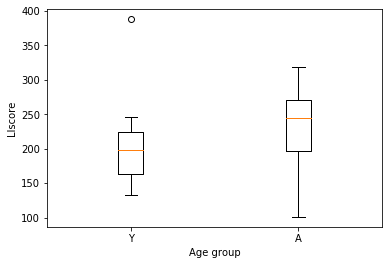

In [6]:
df = data['blood']
d = {group: df.loc[df.Age == group, 'LIscore'] for group in ['Y', 'A']}
fig, ax = plt.subplots()
ax.boxplot(d.values())
ax.set_xticklabels(d.keys())
ax.set_xlabel('Age group')
ax.set_ylabel('LIscore')

In [7]:
def metab_LI_scatter(metabolite, dataset, data=data):
    df = data[dataset]
    dat = df.loc[df.Group.isin(['AI', 'AU']), ['LIscore', metabolite]]
    fig, ax = plt.subplots()
    sns.regplot(x='LIscore', y=metabolite, data=dat, ax=ax)
    #ax.scatter(x='LIscore', y=metabolite, data=dat)
    ax.set_xlabel('LIscore')
    ax.set_ylabel('metabolite level')
    ax.set_title(metabolite)
    return((fig, ax))

To see if linear hypothesis can fit relationship between metabolite level

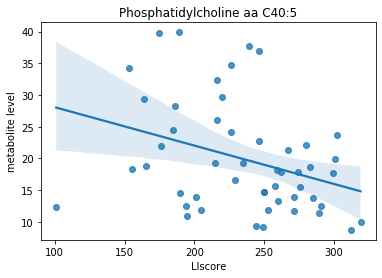

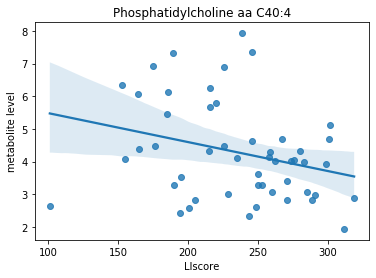

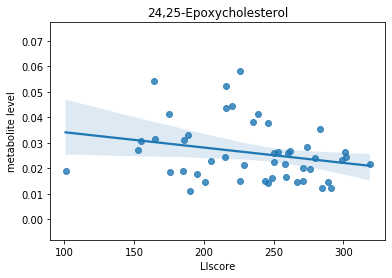

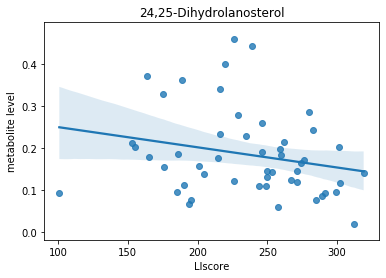

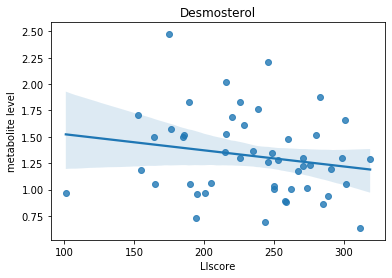

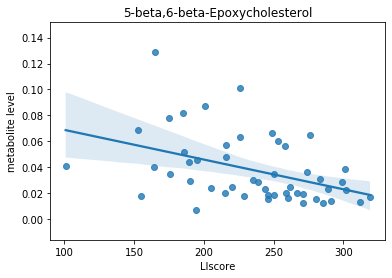

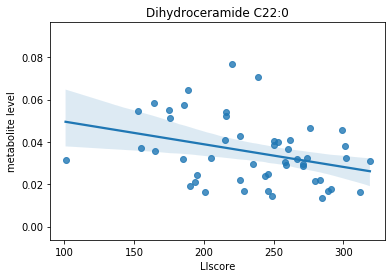

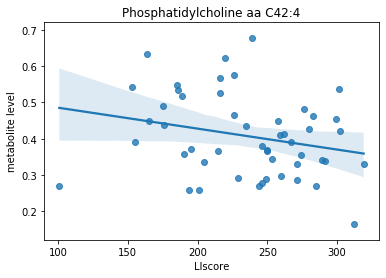

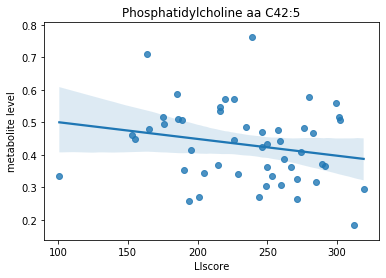

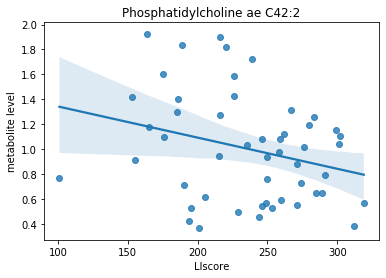

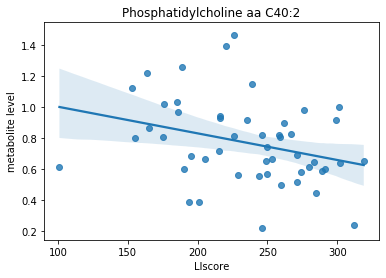

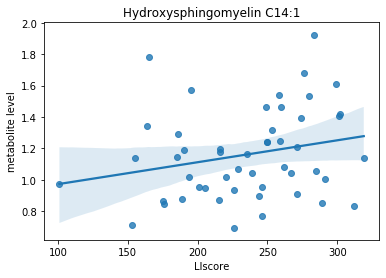

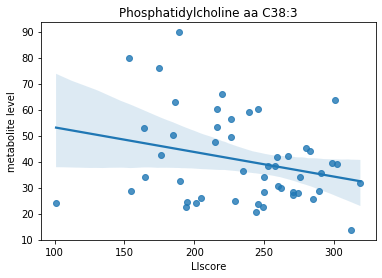

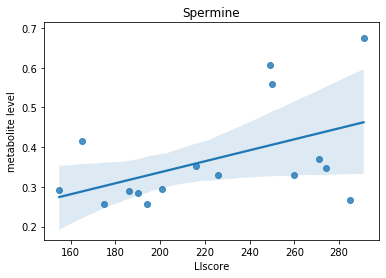

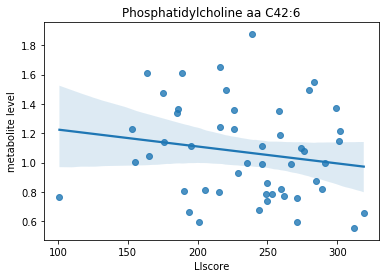

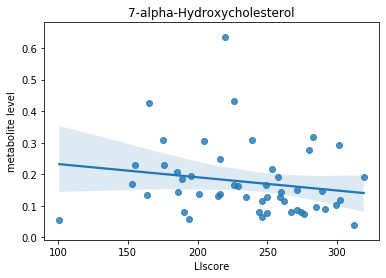

In [8]:
for metabolite in top10:
    fig, ax = metab_LI_scatter(metabolite, 'blood')

In [9]:
dataset = 'blood'
metabolite = 'Phosphatidylcholine aa C40:5'
f1 = 'Q("' + metabolite + '")' + ' ~ Age * LIscore'
f2 = 'Q("' + metabolite + '")' + ' ~ C(Age, levels=["Y", "A"]) * LIscore'
f3 = 'Q("' + metabolite + '")' + ' ~ Age * Q("LIscore cent.")'
f4 = 'Q("' + metabolite + '")' + ' ~ Age + Age : Q("LIscore cent.")'
f5 = 'Q("' + metabolite + '")' + ' ~ C(Age, levels=["Y", "A"]) * Q("LIscore cent.")'
df = data[dataset]
result1, result2, result3, result4, result5 = [smf.ols(f, data=df).fit() for f in [f1, f2, f3, f4, f5]]

In [10]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Phosphatidylcholine aa C40:5")   R-squared:                       0.306
Model:                                           OLS   Adj. R-squared:                  0.277
Method:                                Least Squares   F-statistic:                     10.45
Date:                               Wed, 11 Jan 2023   Prob (F-statistic):           8.92e-06
Time:                                       15:12:03   Log-Likelihood:                -248.75
No. Observations:                                 75   AIC:                             505.5
Df Residuals:                                     71   BIC:                             514.8
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.1235      4.883      6.989      0.000      24.387      43.859
Age[T.Y]           -22.9450      7.590     -3.023      0.003     -38.080      -7.810
LIscore             -0.0605      0.020     -2.970      0.004      -0.101      -0.020
Age[T.Y]:LIscore     0.0642      0.035      1.860      0.067      -0.005       0.133
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.799
Skew:                           0.713   Prob(JB):                       0.0123
Kurtosis:                       3.884   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Phosphatidylcholine aa C40:5")   R-squared:                       0.306
Model:                                           OLS   Adj. R-squared:                  0.277
Method:                                Least Squares   F-statistic:                     10.45
Date:                               Wed, 11 Jan 2023   Prob (F-statistic):           8.92e-06
Time:                                       15:12:03   Log-Likelihood:                -248.75
No. Observations:                                 75   AIC:                             505.5
Df Residuals:                                     71   BIC:                             514.8
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.1785      5.811      1.924      0.058      -0.409      22.766
C(Age, levels=["Y", "A"])[T.A]            22.9450      7.590      3.023      0.003       7.810      38.080
LIscore                                    0.0038      0.028      0.135      0.893      -0.052       0.059
C(Age, levels=["Y", "A"])[T.A]:LIscore    -0.0642      0.035     -1.860      0.067      -0.133       0.005
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.799
Skew:                           0.713   Prob(JB):                       0.0123
Kurtosis:                       3.884   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Phosphatidylcholine aa C40:5")   R-squared:                       0.306
Model:                                           OLS   Adj. R-squared:                  0.277
Method:                                Least Squares   F-statistic:                     10.45
Date:                               Wed, 11 Jan 2023   Prob (F-statistic):           8.92e-06
Time:                                       15:12:03   Log-Likelihood:                -248.75
No. Observations:                                 75   AIC:                             505.5
Df Residuals:                                     71   BIC:                             514.8
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      20.5666      0.995     20.679      0.000      18.583      22.550
Age[T.Y]                       -8.5428      1.799     -4.748      0.000     -12.131      -4.955
Q("LIscore cent.")             -0.0605      0.020     -2.970      0.004      -0.101      -0.020
Age[T.Y]:Q("LIscore cent.")     0.0642      0.035      1.860      0.067      -0.005       0.133
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.799
Skew:                           0.713   Prob(JB):                       0.0123
Kurtosis:                       3.884   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Phosphatidylcholine aa C40:5")   R-squared:                       0.306
Model:                                           OLS   Adj. R-squared:                  0.277
Method:                                Least Squares   F-statistic:                     10.45
Date:                               Wed, 11 Jan 2023   Prob (F-statistic):           8.92e-06
Time:                                       15:12:03   Log-Likelihood:                -248.75
No. Observations:                                 75   AIC:                             505.5
Df Residuals:                                     71   BIC:                             514.8
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.5666      0.995     20.679      0.000      18.583      22.550
Age[T.Y]                     -8.5428      1.799     -4.748      0.000     -12.131      -4.955
Age[A]:Q("LIscore cent.")    -0.0605      0.020     -2.970      0.004      -0.101      -0.020
Age[Y]:Q("LIscore cent.")     0.0038      0.028      0.135      0.893      -0.052       0.059
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.799
Skew:                           0.713   Prob(JB):                       0.0123
Kurtosis:                       3.884   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Phosphatidylcholine aa C40:5")   R-squared:                       0.306
Model:                                           OLS   Adj. R-squared:                  0.277
Method:                                Least Squares   F-statistic:                     10.45
Date:                               Wed, 11 Jan 2023   Prob (F-statistic):           8.92e-06
Time:                                       15:12:03   Log-Likelihood:                -248.75
No. Observations:                                 75   AIC:                             505.5
Df Residuals:                                     71   BIC:                             514.8
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            12.0238      1.499      8.019      0.000       9.034      15.014
C(Age, levels=["Y", "A"])[T.A]                        8.5428      1.799      4.748      0.000       4.955      12.131
Q("LIscore cent.")                                    0.0038      0.028      0.135      0.893      -0.052       0.059
C(Age, levels=["Y", "A"])[T.A]:Q("LIscore cent.")    -0.0642      0.035     -1.860      0.067      -0.133       0.005
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.799
Skew:                           0.713   Prob(JB):                       0.0123
Kurtosis:                       3.884   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fitting all the data

In [15]:
def fit1metabolite(metabolite, dataset, data=data, formula=f4):
    df = data[dataset]
    lhs = 'Q("' + metabolite + '")'
    rhs = re.sub('^.*\\~ ', '', formula)
    f = lhs + ' ~ ' + rhs
    #f = 'Q("' + metabolite + '")' + ' ~ Age + Age : Q("LIscore cent.")' # we fit M_4
    result = smf.ols(f, data=df).fit()
    result.summary()
    d = {'Estimate': result.params, 'SE': result.bse, 'p': result.pvalues}
    ll = [a.to_list() for a in d.values()]
    l = itertools.chain(*ll)
    ix = pd.MultiIndex.from_product([d.keys(), d['Estimate'].index])
    df = pd.DataFrame({metabolite: l}, index=ix).transpose()
    df[('Goodness of fit', 'omnipv')] = result.diagn['omnipv']
    df[('Goodness of fit', 'jbpv')] = result.diagn['jbpv']
    df[('General', 'R-squared')] = result.rsquared
    df[('General', 'Dataset')] = dataset
    return(df)

In [16]:
summary1 = summary.loc[summary.Comparison == 'AI vs. AU', ['Dataset', 'Analyte class', 'Metabolite', 'p']]
l = summary1.apply(lambda s: fit1metabolite(s.Metabolite, s.Dataset, data=data), axis=1)
regsummary = pd.concat(l.to_list(), axis=0)

In [18]:
def add_t_test(dataset='blood', resummary=regsummary, summary1=summary1):
    left = regsummary.loc[regsummary[('General', 'Dataset')] == dataset]
    right = summary1.loc[summary1['Dataset'] == dataset, ['p']]
    right.columns = pd.MultiIndex.from_product([['t-test'], ['p']])
    val = pd.concat([left, right], axis=1)
    return(val)

l = [add_t_test(dataset) for dataset in data.keys()]
regsummary_t = pd.concat(l, axis=0)

Text(0.5, 1.0, 'Distribution of the JB $p$-value across all 1585 fits')

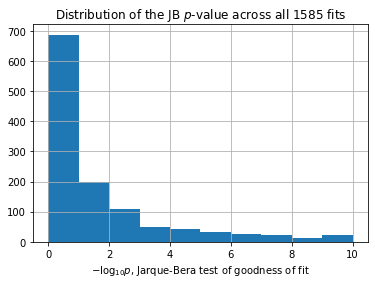

In [29]:
fig, ax = plt.subplots()
regsummary[('Goodness of fit', 'jbpv')].apply(lambda x: - np.log10(x)).hist(ax=ax, range=(0, 10))
ax.set_xlabel(r'$- \log_{10} p$, Jarque-Bera test of goodness of fit')
ax.set_title(r'Distribution of the JB $p$-value across all ' + str(regsummary.shape[0]) + ' fits')

Text(0.5, 3.200000000000003, 'Analyte class')

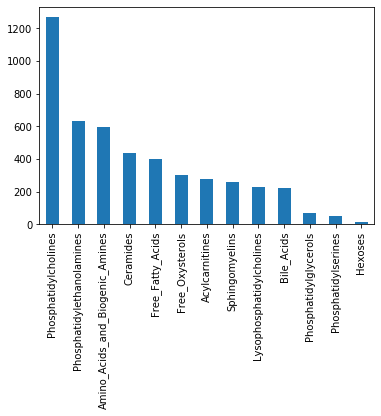

In [67]:
#fpath = '../RatMetabolites/rat_metab_summary.csv'
df = pd.read_csv('../RatMetabolites/rat_metab_summary.csv')
df['Analyte class'].value_counts().plot(kind='bar')
ax.set_xlabel(r'Analyte class')

Text(0.5, 3.200000000000003, 'Analyte class')

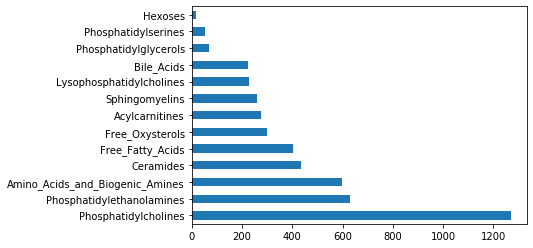

In [71]:
#fpath = '../RatMetabolites/rat_metab_summary.csv'
df = pd.read_csv('../RatMetabolites/rat_metab_summary.csv')
df['Analyte class'].value_counts()[:13].plot(kind='barh')
ax.set_xlabel(r'Analyte class')

Analyte class
Acylcarnitines                     AxesSubplot(0.125,0.125;0.775x0.755)
Amino_Acids_and_Biogenic_Amines    AxesSubplot(0.125,0.125;0.775x0.755)
Bile_Acids                         AxesSubplot(0.125,0.125;0.775x0.755)
Ceramides                          AxesSubplot(0.125,0.125;0.775x0.755)
Free_Fatty_Acids                   AxesSubplot(0.125,0.125;0.775x0.755)
Free_Oxysterols                    AxesSubplot(0.125,0.125;0.775x0.755)
Hexoses                            AxesSubplot(0.125,0.125;0.775x0.755)
Lysophosphatidylcholines           AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylcholines               AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylethanolamines          AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylglycerols              AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylserines                AxesSubplot(0.125,0.125;0.775x0.755)
Sphingomyelins                     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

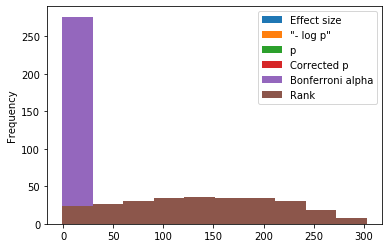

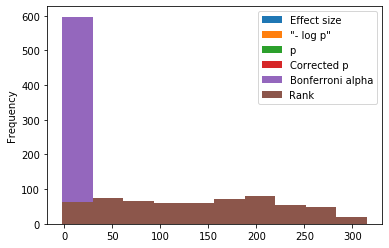

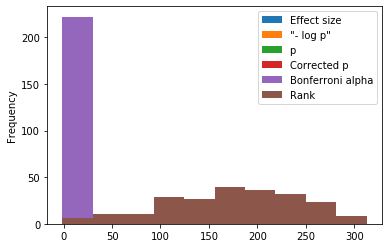

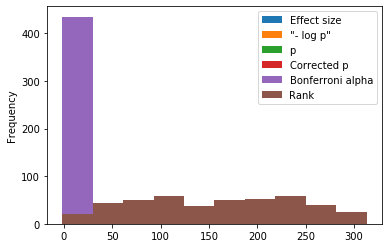

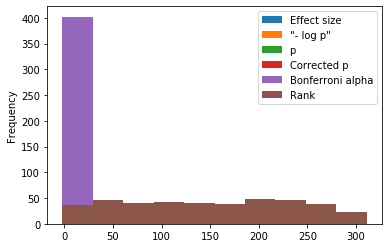

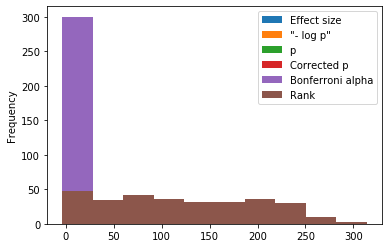

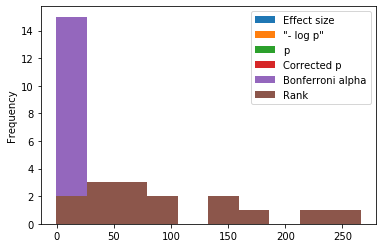

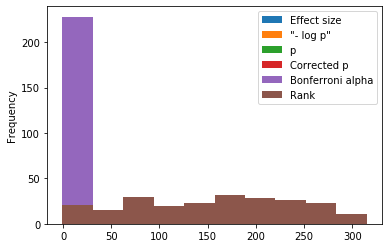

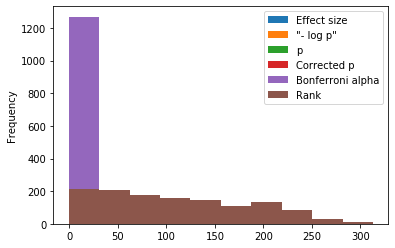

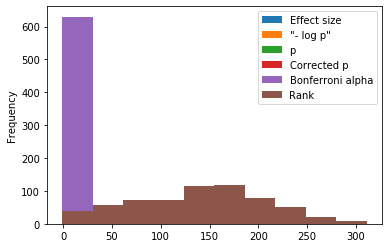

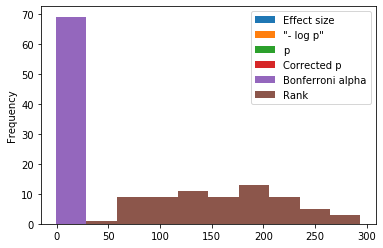

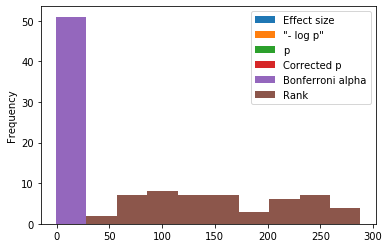

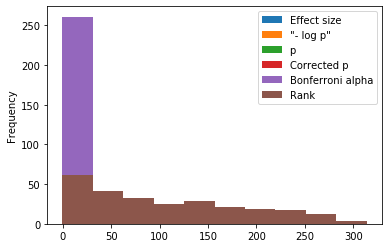

In [80]:
df.groupby('Analyte class').plot(kind='hist')

Analyte class
Acylcarnitines                     AxesSubplot(0.125,0.125;0.775x0.755)
Amino_Acids_and_Biogenic_Amines    AxesSubplot(0.125,0.125;0.775x0.755)
Bile_Acids                         AxesSubplot(0.125,0.125;0.775x0.755)
Ceramides                          AxesSubplot(0.125,0.125;0.775x0.755)
Free_Fatty_Acids                   AxesSubplot(0.125,0.125;0.775x0.755)
Free_Oxysterols                    AxesSubplot(0.125,0.125;0.775x0.755)
Hexoses                            AxesSubplot(0.125,0.125;0.775x0.755)
Lysophosphatidylcholines           AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylcholines               AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylethanolamines          AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylglycerols              AxesSubplot(0.125,0.125;0.775x0.755)
Phosphatidylserines                AxesSubplot(0.125,0.125;0.775x0.755)
Sphingomyelins                     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

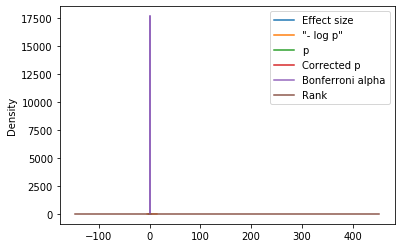

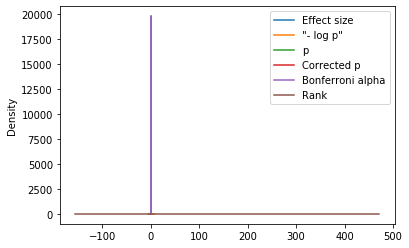

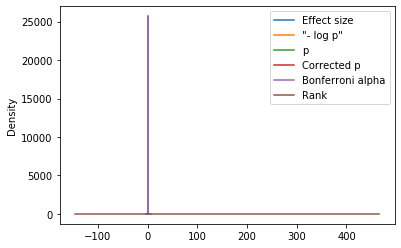

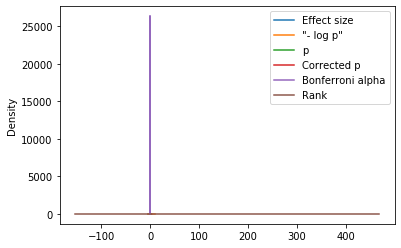

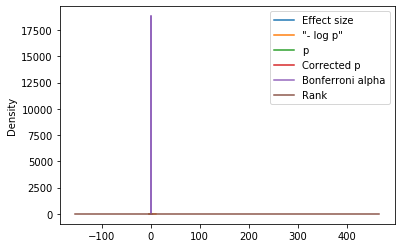

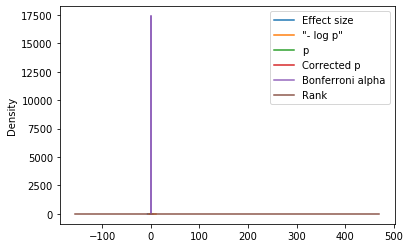

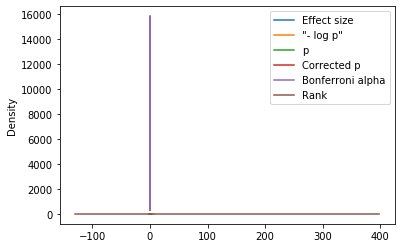

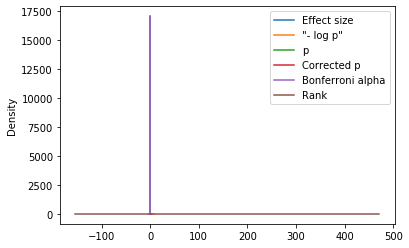

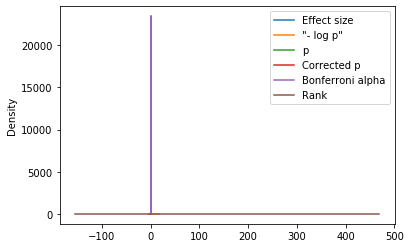

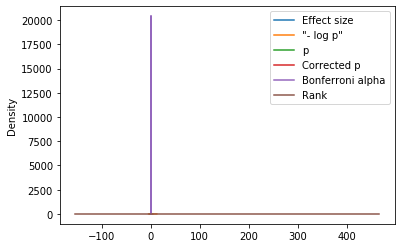

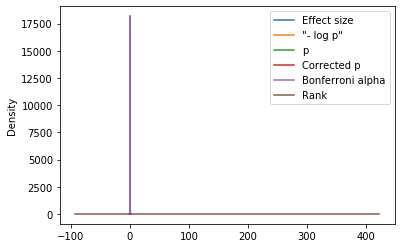

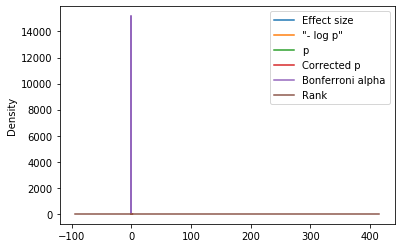

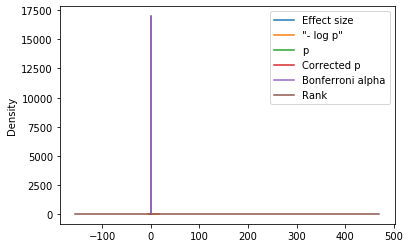

In [84]:
df.groupby('Analyte class').plot(kind='kde')